In [30]:
%pylab --no-import-all
%matplotlib inline

Using matplotlib backend: TkAgg
Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.5/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['np']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [37]:
from control.matlab import *

In [38]:
sys1 = tf([1],[5,1])

In [39]:
dt = 0.1
t0 = 0
tfinal = 300
T = np.arange(t0, tfinal+dt, dt)
U = np.zeros(T.shape)

In [53]:
(T>60) & (T<90)

array([False, False, False, ..., False, False, False], dtype=bool)

In [54]:
U[(T>60) & (T<90)]=200

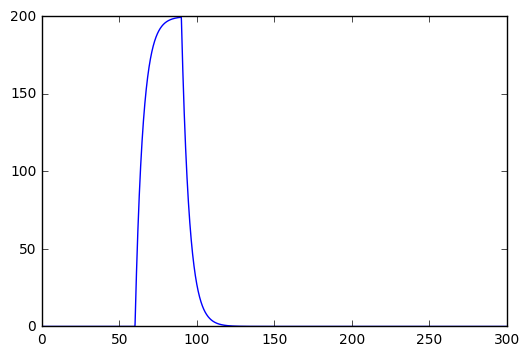

In [57]:
yout, T, xout = lsim(sys1, U=U, T=T)
plt.plot(T,yout)

In [72]:
crank_speed = 200
idle_speed  = 600
steps = np.arange(crank_speed,idle_speed,100)
for i in range(len(steps)):
    rpm = steps[i]
    U[T>rpm]=crank_speed+i*50

In [74]:
steps

array([80, 85, 90, 95])

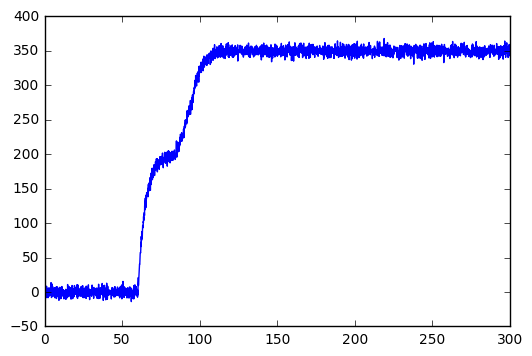

In [73]:
yout, T, xout = lsim(sys1, U=U, T=T)
plt.plot(T,yout+np.random.normal(0, 5, yout.shape))

array([-0.34695957,  0.62503834,  0.18614377, ...,  0.28715235,
       -0.35649213,  0.03380107])